In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc

In [3]:
df_merge = pd.read_csv('./df_merge.csv')

In [4]:
df_merge['y'].value_counts()

no     35111
yes     3114
Name: y, dtype: int64

In [5]:
df_merge_y_no = df_merge[df_merge['y'] == 'yes']

In [6]:
from random import sample

In [7]:
df_merge_y_yes = df_merge[df_merge['y'] == 'no'].sample(3114, random_state = 2019)

In [8]:
df_merge_balance = pd.concat([df_merge_y_yes, df_merge_y_no], axis = 0)

In [9]:
df_merge_balance_x = df_merge_balance.drop('y', axis = 1)

In [10]:
df_merge_balance_y = df_merge_balance['y']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(df_merge_balance_x, df_merge_balance_y, test_size = .3, random_state = 2019)

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
lr = LogisticRegression()

In [21]:
model = lr.fit(x_train, y_train)
y_pred = model.predict(x_test)

C:\Users\Thinkpad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix

In [23]:
accuracy_score(y_test, y_pred)

0.875334403424291

In [24]:
balanced_accuracy_score(y_test, y_pred)

0.8756587547299621

In [25]:
confusion_matrix(y_test, y_pred)

array([[840, 129],
       [104, 796]], dtype=int64)

In [26]:
confusion_matrix(y_test, y_pred)/confusion_matrix(y_test, y_pred).sum(axis=1)

array([[0.86687307, 0.14333333],
       [0.10732714, 0.88444444]])

In [27]:
prob = model.predict_proba(x_test)

In [35]:
pred = prob[::, 1]

In [36]:
pred

array([0.00744492, 0.94372488, 0.01709565, ..., 0.88039925, 0.97858345,
       0.50033221])

In [47]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test, pred)

In [57]:
fpr, tpr, _1 = roc_curve(y_test, pred, pos_label='yes')

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0,0.5,'True Positive Rate')

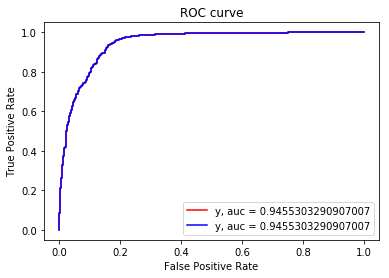

In [56]:
plt.plot(fpr, tpr, label = 'y, auc = ' + str(score), color = 'red')
plt.legend(loc = 4)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rf = RandomForestClassifier()

In [64]:
model_rf = rf.fit(x_train, y_train)

In [66]:
y_pred_rf = model_rf.predict(x_test)

In [68]:
confusion_matrix(y_test, y_pred_rf)/confusion_matrix(y_test, y_pred_rf).sum(axis=1)

array([[0.8875129 , 0.12111111],
       [0.12796698, 0.86222222]])

In [69]:
accuracy_score(y_test, y_pred_rf)

0.875334403424291

In [70]:
balanced_accuracy_score(y_test, y_pred_rf)

0.8748675610595116